In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_recall_fscore_support, log_loss, roc_auc_score

In [2]:
data = pd.read_csv(r"C:\Users\prane\OneDrive\Desktop\Jupyter Notebook\Machine Learning ASE\Project\rideshare_kaggle.csv").sample(30000)
data.drop('id', axis=1, inplace=True)
data

,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
228233,1.543503e+09,14,29,11,29-11-2018 14:48,America/New_York,South Station,Beacon Hill,Uber,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,...,0.0000,1543510800,35.20,1543550400,44.96,1543510800,31.40,1543550400,38.85,1543510800
588205,1.543436e+09,20,28,11,28-11-2018 20:17,America/New_York,Northeastern University,Back Bay,Uber,6d318bcc-22a3-4af6-bddd-b409bfce1546,...,0.0000,1543420800,33.70,1543399200,42.57,1543438800,29.94,1543399200,36.55,1543438800
329825,1.543809e+09,3,3,12,03-12-2018 03:43,America/New_York,West End,Fenway,Lyft,lyft_premier,...,0.1055,1543770000,36.35,1543726800,52.86,1543788000,35.33,1543744800,52.19,1543788000
154020,1.545084e+09,21,17,12,17-12-2018 21:55,America/New_York,Boston University,Beacon Hill,Lyft,lyft_premier,...,0.0217,1545066000,34.22,1545044400,41.44,1545076800,28.61,1545044400,36.09,1545076800
22305,1.544843e+09,3,15,12,15-12-2018 03:00,America/New_York,Beacon Hill,Northeastern University,Uber,55c66225-fbe7-4fd5-9072-eab1ece5e23e,...,0.0000,1544806800,27.21,1544781600,46.63,1544814000,24.55,1544785200,43.84,1544817600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245462,1.544961e+09,11,16,12,16-12-2018 11:55,America/New_York,South Station,West End,Uber,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,...,0.1257,1544979600,38.48,1544954400,43.61,1544990400,34.01,1545019200,38.37,1544986800
479196,1.543299e+09,6,27,11,27-11-2018 06:03,America/New_York,Financial District,Haymarket Square,Uber,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
366488,1.544806e+09,16,14,12,14-12-2018 16:40,America/New_York,Theatre District,South Station,Uber,997acbb5-e102-41e1-b155-9df7de0a73f2,...,0.0000,1544806800,27.11,1544781600,46.61,1544814000,27.76,1544781600,43.85,1544817600
467301,1.543434e+09,19,28,11,28-11-2018 19:38,America/New_York,Fenway,Back Bay,Lyft,lyft_luxsuv,...,0.0000,1543420800,33.82,1543399200,42.72,1543438800,30.19,1543399200,36.75,1543438800


<span style="font-size: 22px; color: green; font-weight: bold">Data Preprocessing</span>

<span style="font-size: 16px; color: green; font-weight: bold">Data Inspection</span>

In [3]:
# To get number of rows and columns in the dataset
num_rows, num_columns = data.shape
num_rows, num_columns

(30000, 56)

In [4]:
# To find the number of missing values in each column
data.isnull().sum()

timestamp                         0
hour                              0
day                               0
month                             0
datetime                          0
timezone                          0
source                            0
destination                       0
cab_type                          0
product_id                        0
name                              0
price                          2327
distance                          0
surge_multiplier                  0
latitude                          0
longitude                         0
temperature                       0
apparentTemperature               0
short_summary                     0
long_summary                      0
precipIntensity                   0
precipProbability                 0
humidity                          0
windSpeed                         0
windGust                          0
windGustTime                      0
visibility                        0
temperatureHigh             

<span style="font-size: 16px; color: green; font-weight: bold">Handling missing values</span>

In [5]:
# To fill the missing values in the "price" attribute with the mean
mean_price = data['price'].mean()
data['price'].fillna(mean_price, inplace = True)

In [6]:
data.isnull().sum()

timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatureLow                 0
temperatur

<span style="font-size: 16px; color: green; font-weight: bold">Discretizing the price attribute</span>

In [7]:
price_bins = [float('-inf'), 13, 26, float('inf')]
price_labels = ['low', 'medium', 'high']

In [8]:
data['price_category'] = pd.cut(data['price'], bins=price_bins, labels=price_labels, include_lowest=True).astype(str)

In [9]:
data.shape

(30000, 57)

In [10]:
data['price_category']

228233       low
588205      high
329825    medium
154020    medium
22305        low
           ...  
245462       low
479196    medium
366488       low
467301    medium
111103    medium
Name: price_category, Length: 30000, dtype: object

In [11]:
data.shape

(30000, 57)

<span style="font-size: 16px; color: green; font-weight: bold">Data Visualization</span>

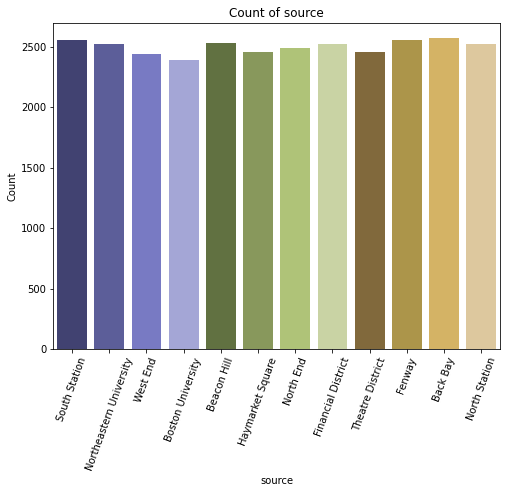

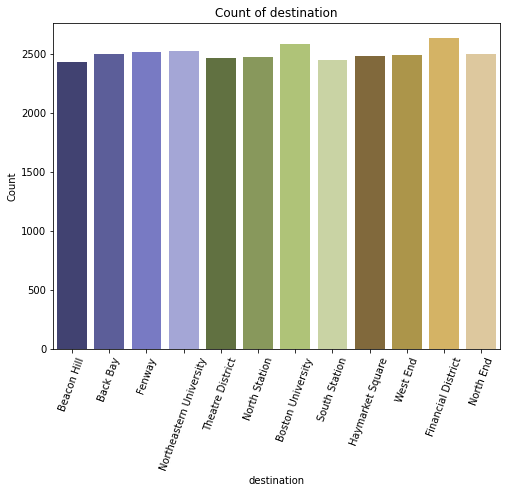

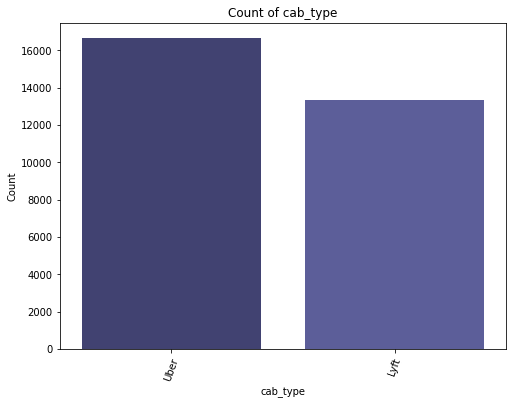

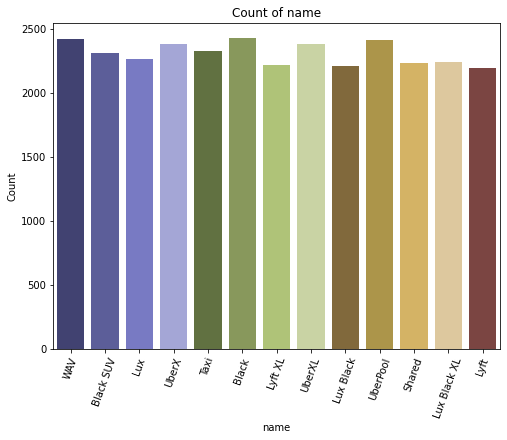

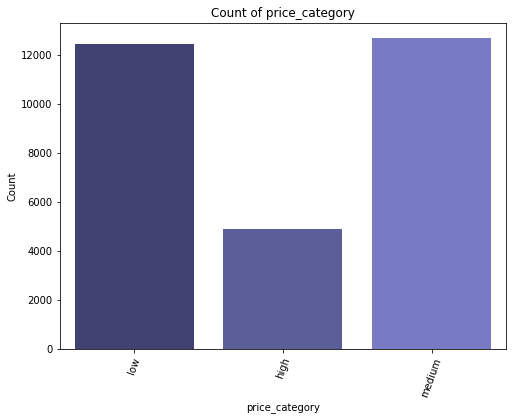

In [14]:
categorical_attributes = ['source', 'destination', 'cab_type', 'name', 'price_category']

for col in categorical_attributes:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, data=data)
    sns.set_palette('tab20b')
    plt.title(f'Count of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=70)
    plt.show()


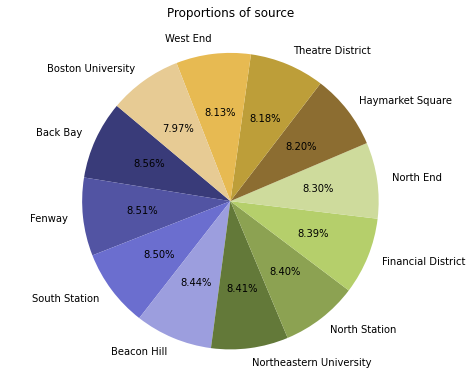

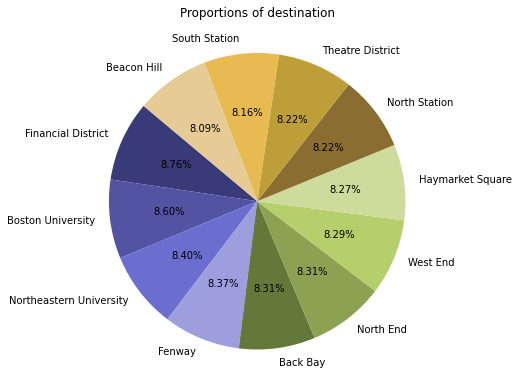

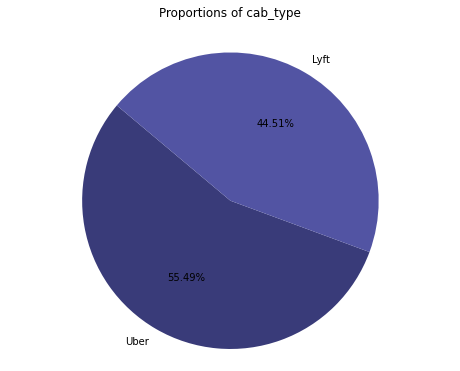

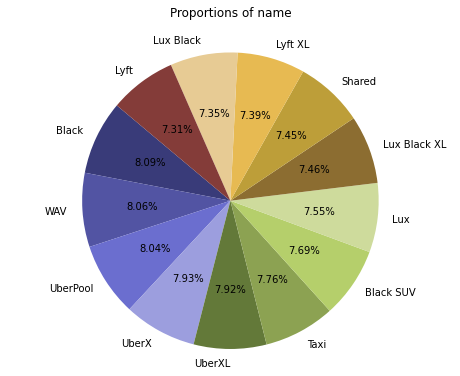

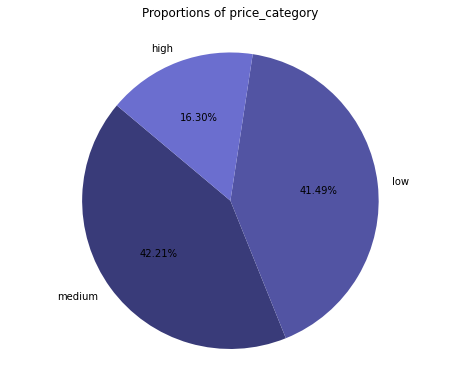

In [15]:
# Pie charts
for col in categorical_attributes:
    # Calculate value counts for each category
    counts = data[col].value_counts()

    plt.figure(figsize=(8, 6))
    plt.title(f'Proportions of {col}\n')
    sns.set_palette('tab20b')
    plt.pie(counts, labels=counts.index, autopct='%1.2f%%', startangle=140)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
    plt.show()


<span style="font-size: 16px; color: green; font-weight: bold">Data Encoding</span>

In [16]:
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()
categorical_columns

['datetime',
 'timezone',
 'source',
 'destination',
 'cab_type',
 'product_id',
 'name',
 'short_summary',
 'long_summary',
 'icon',
 'price_category']

In [17]:
numeric_columns = data.select_dtypes(include=['int', 'float']).columns.tolist()
numeric_columns

['timestamp',
 'hour',
 'day',
 'month',
 'price',
 'distance',
 'surge_multiplier',
 'latitude',
 'longitude',
 'temperature',
 'apparentTemperature',
 'precipIntensity',
 'precipProbability',
 'humidity',
 'windSpeed',
 'windGust',
 'windGustTime',
 'visibility',
 'temperatureHigh',
 'temperatureHighTime',
 'temperatureLow',
 'temperatureLowTime',
 'apparentTemperatureHigh',
 'apparentTemperatureHighTime',
 'apparentTemperatureLow',
 'apparentTemperatureLowTime',
 'dewPoint',
 'pressure',
 'windBearing',
 'cloudCover',
 'uvIndex',
 'visibility.1',
 'ozone',
 'sunriseTime',
 'sunsetTime',
 'moonPhase',
 'precipIntensityMax',
 'uvIndexTime',
 'temperatureMin',
 'temperatureMinTime',
 'temperatureMax',
 'temperatureMaxTime',
 'apparentTemperatureMin',
 'apparentTemperatureMinTime',
 'apparentTemperatureMax',
 'apparentTemperatureMaxTime']

In [18]:
# To seperate the ordinal and nominal columns
ordinal_columns = ['price_category']
nominal_columns = [col for col in categorical_columns if col not in ordinal_columns]

In [19]:
# One-hot encoding nominal attributes
data_encoded = pd.get_dummies(data, columns=nominal_columns, drop_first=True)

In [20]:
# Label-encoding ordinal attributes
label_encoder = LabelEncoder()
for column in ordinal_columns:
    data_encoded[column] = label_encoder.fit_transform(data[column])

In [21]:
data_encoded['price_category']

228233    1
588205    0
329825    2
154020    2
22305     1
         ..
245462    1
479196    2
366488    1
467301    2
111103    2
Name: price_category, Length: 30000, dtype: int32

<span style="font-size: 16px; color: green; font-weight: bold">Scaling numeric attributes</span>

In [22]:
numeric_columns = data_encoded.select_dtypes(include=['int', 'float']).columns
numeric_columns = numeric_columns.drop('price_category', errors='ignore')

In [23]:
# Creating a StandardScaler instance
scaler = StandardScaler()

In [24]:
data_encoded[numeric_columns] = scaler.fit_transform(data_encoded[numeric_columns])

In [25]:
data_encoded

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,...,long_summary_ Possible drizzle in the morning.,long_summary_ Rain in the morning and afternoon.,long_summary_ Rain throughout the day.,"long_summary_ Rain until morning, starting again in the evening.",icon_ clear-night,icon_ cloudy,icon_ fog,icon_ partly-cloudy-day,icon_ partly-cloudy-night,icon_ rain
228233,-0.770928,0.344641,1.118878,-1.186956,-5.100428e-01,0.254493,-0.149363,0.258548,-1.929356,0.273068,...,False,False,False,False,False,False,False,True,False,False
588205,-0.864133,1.211930,1.018161,-1.186956,1.102544e+00,-0.705423,-0.149363,0.548808,0.004138,0.350398,...,False,False,False,False,False,True,False,False,False,False
329825,-0.343438,-1.245388,-1.499771,0.842491,3.240537e-01,0.629733,-0.149363,-2.575147,1.632602,1.273896,...,False,False,True,False,False,True,False,False,False,False
154020,1.439701,1.356478,-0.089729,0.842491,-9.584891e-03,0.367937,-0.149363,0.258548,-1.929356,0.136253,...,False,False,False,False,False,False,False,False,True,False
22305,1.102838,-1.245388,-0.291164,0.842491,-8.436814e-01,-0.208012,-0.149363,0.371311,0.550239,0.490187,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245462,1.268552,-0.089003,-0.190446,0.842491,-8.992878e-01,-0.208012,-0.149363,0.258548,-1.929356,0.085691,...,False,False,True,False,False,True,False,False,False,False
479196,-1.056597,-0.811744,0.917444,-1.186956,-3.951075e-16,-0.836320,-0.149363,-2.575147,1.632602,0.516955,...,False,False,False,False,False,False,False,False,False,True
366488,1.050812,0.633737,-0.391881,0.842491,-8.992878e-01,-1.386090,-0.149363,0.584308,0.151733,0.512493,...,False,False,False,False,False,False,False,False,False,False
467301,-0.867413,1.067382,1.018161,-1.186956,1.046937e+00,-0.635611,-0.149363,0.254371,-0.728917,0.284965,...,False,False,False,False,False,True,False,False,False,False


<span style="font-size: 16px; color: green; font-weight: bold">Handling the Outliers</span>

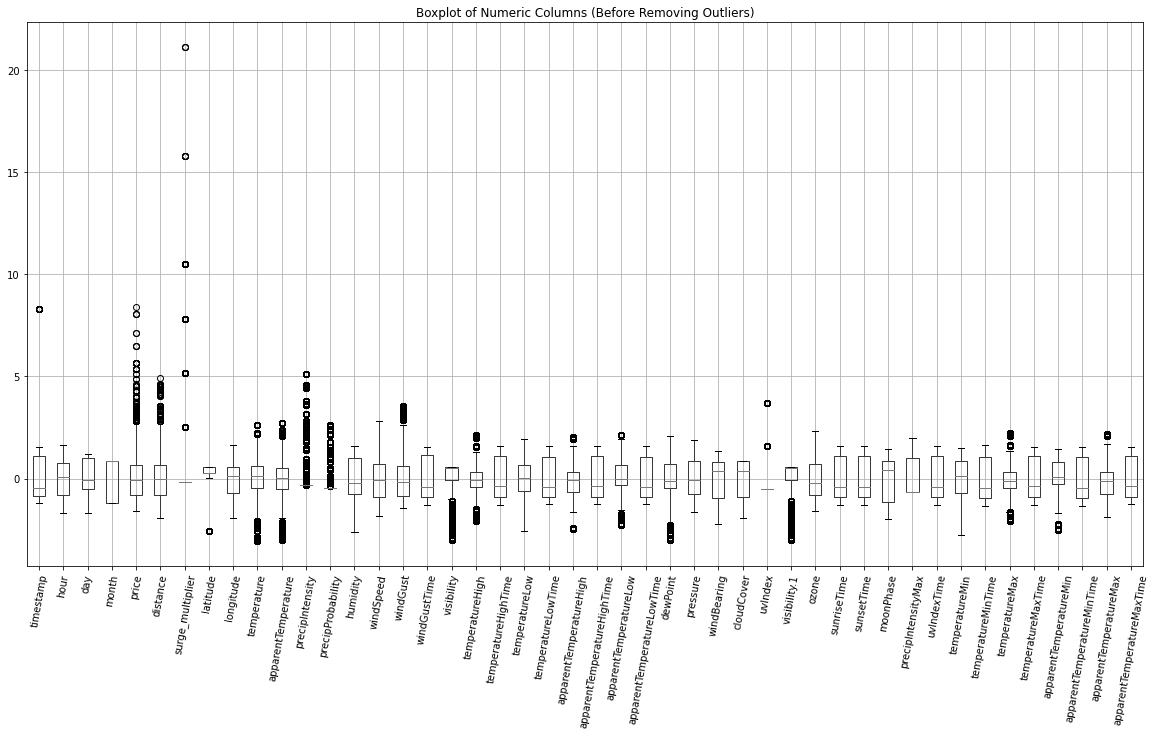

In [26]:
# Boxplots before removing outliers
plt.figure(figsize=(20,10))
data_encoded[numeric_columns].boxplot()
plt.title('Boxplot of Numeric Columns (Before Removing Outliers)')
plt.xticks(rotation=80)
plt.show()

In [27]:
# Removing outliers using the z-score method
data_encoded_no_outliers = data_encoded[(np.abs(stats.zscore(data_encoded[numeric_columns])) < 3).all(axis=1)]

print("Original Dataset Shape:", data_encoded.shape)
print("Dataset Shape After Removing Outliers:", data_encoded_no_outliers.shape)

Original Dataset Shape: (30000, 5808)
Dataset Shape After Removing Outliers: (26761, 5808)


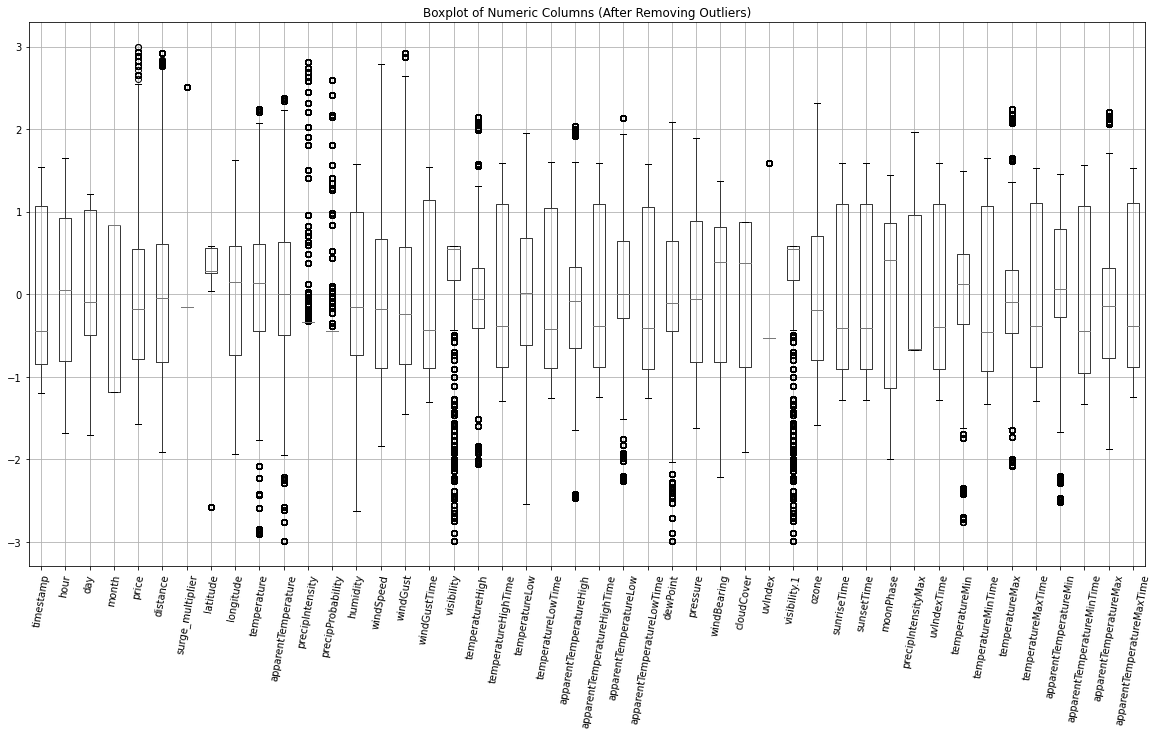

In [28]:
# Boxplots after removing outliers
plt.figure(figsize=(20,10))
data_encoded_no_outliers[numeric_columns].boxplot()
plt.title('Boxplot of Numeric Columns (After Removing Outliers)')
plt.xticks(rotation=80)
plt.show()

<span style="font-size: 16px; color: green; font-weight: bold">Data Split</span>

In [29]:
X = data_encoded_no_outliers.drop('price_category', axis=1)
y = data_encoded_no_outliers['price_category']

In [30]:
# Splitting the data into training and testing (7:3 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [31]:
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (18732, 5807) (18732,)
Testing set shape: (8029, 5807) (8029,)


<span style="font-size: 22px; color: green; font-weight: bold">Model Training</span>

<span style="font-size: 18px; color: green; font-weight: bold">Support Vector Machine(SVM)</span>

<span style="font-size: 16px; color: green; font-weight: bold">Linear Kernel</span>

In [32]:
# Initializing the SVM classifier
svm_linear = SVC(kernel='linear', random_state=42)
svm_linear

SVC(kernel='linear', random_state=42)

In [33]:
# Fit the classifier on the training data
svm_linear.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [34]:
# Predict on the test set
y_pred_linear = svm_linear.predict(X_test)

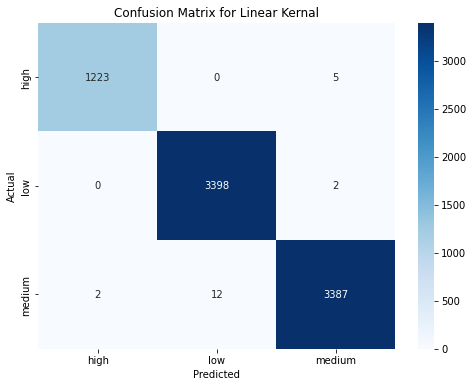

In [35]:
#To print the confusion matrix
cm_linear = confusion_matrix(y_test, y_pred_linear)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_linear, annot=True, cmap='Blues', fmt='d', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Linear Kernal')
plt.show()

In [36]:
# Evaluation metrics
print("\nAccuracy Score:", accuracy_score(y_test, y_pred_linear))
precision_linear, recall_linear, fscore_linear, _ = precision_recall_fscore_support(y_test, y_pred_linear, average='weighted')
print("Precision:", precision_linear)
print("Recall:", recall_linear)
print("F1 Score:", fscore_linear)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_linear))


Accuracy Score: 0.997384481255449
Precision: 0.9973864560237216
Recall: 0.997384481255449
F1 Score: 0.997383881149774

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1228
           1       1.00      1.00      1.00      3400
           2       1.00      1.00      1.00      3401

    accuracy                           1.00      8029
   macro avg       1.00      1.00      1.00      8029
weighted avg       1.00      1.00      1.00      8029



<span style="font-size: 16px; color: green; font-weight: bold">Polynomial Kernel</span>

In [37]:
svm_poly = SVC(kernel='poly', degree=3, random_state=42)
svm_poly

SVC(kernel='poly', random_state=42)

In [38]:
# Fit the classifier on the training data
svm_poly.fit(X_train, y_train)

SVC(kernel='poly', random_state=42)

In [39]:
# Predict on the test set
y_pred_poly = svm_poly.predict(X_test)

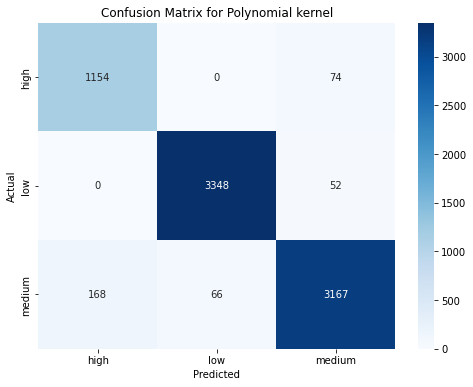

In [40]:
#To print the confusion matrix
cm_poly = confusion_matrix(y_test, y_pred_poly)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_poly, annot=True, cmap='Blues', fmt='d', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Polynomial kernel')
plt.show()

In [41]:
# Evaluation metrics
print("\nAccuracy Score:", accuracy_score(y_test, y_pred_poly))
precision_poly, recall_poly, fscore_poly, _ = precision_recall_fscore_support(y_test, y_pred_poly, average='weighted')
print("Precision:", precision_poly)
print("Recall:", recall_poly)
print("F1 Score:", fscore_poly)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_poly))


Accuracy Score: 0.955162535807697
Precision: 0.9561693592307494
Recall: 0.955162535807697
F1 Score: 0.9553714684212993

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.94      0.91      1228
           1       0.98      0.98      0.98      3400
           2       0.96      0.93      0.95      3401

    accuracy                           0.96      8029
   macro avg       0.94      0.95      0.94      8029
weighted avg       0.96      0.96      0.96      8029



<span style="font-size: 16px; color: green; font-weight: bold">RBF Kernel</span>

In [42]:
svm_rbf = SVC(kernel='rbf', random_state=42)
svm_rbf

SVC(random_state=42)

In [43]:
# Fit the classifier on the training data
svm_rbf.fit(X_train, y_train)

SVC(random_state=42)

In [44]:
# Predict on the test set
y_pred_rbf = svm_rbf.predict(X_test)

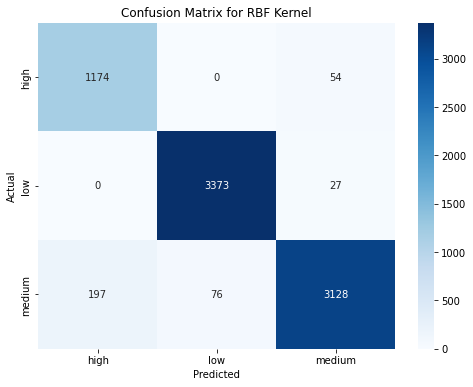

In [45]:
#To print the confusion matrix
cm_rbf = confusion_matrix(y_test, y_pred_rbf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_rbf, annot=True, cmap='Blues', fmt='d', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for RBF Kernel')
plt.show()

In [46]:
# Evaluation metrics
print("\nAccuracy Score:", accuracy_score(y_test, y_pred_rbf))
precision_rbf, recall_rbf, fscore_rbf, _ = precision_recall_fscore_support(y_test, y_pred_rbf, average='weighted')
print("Precision:", precision_rbf)
print("Recall:", recall_rbf)
print("F1 Score:", fscore_rbf)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rbf))


Accuracy Score: 0.9559098268775688
Precision: 0.9579998927658411
Recall: 0.9559098268775688
F1 Score: 0.9561754020075687

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.96      0.90      1228
           1       0.98      0.99      0.98      3400
           2       0.97      0.92      0.95      3401

    accuracy                           0.96      8029
   macro avg       0.94      0.96      0.94      8029
weighted avg       0.96      0.96      0.96      8029



<span style="font-size: 16px; color: green; font-weight: bold">Sigmoid Kernel</span>

In [47]:
svm_sigmoid = SVC(kernel='sigmoid', random_state=42)
svm_sigmoid

SVC(kernel='sigmoid', random_state=42)

In [48]:
# Fit the classifier on the training data
svm_sigmoid.fit(X_train, y_train)

SVC(kernel='sigmoid', random_state=42)

In [49]:
# Predict on the test set
y_pred_sigmoid = svm_sigmoid.predict(X_test)

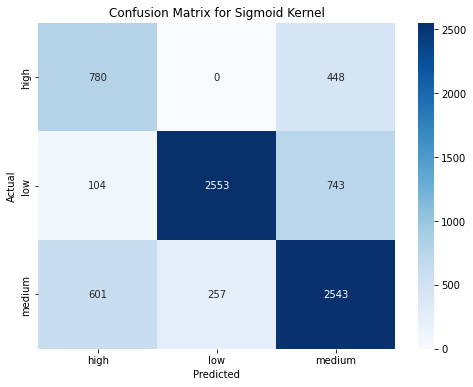

In [50]:
#To print the confusion matrix
cm_sigmoid = confusion_matrix(y_test, y_pred_sigmoid)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_sigmoid, annot=True, cmap='Blues', fmt='d', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Sigmoid Kernel')
plt.show()

In [51]:
# Evaluation metrics
print("\nAccuracy Score:", accuracy_score(y_test, y_pred_sigmoid))
precision_sigmoid, recall_sigmoid, fscore_sigmoid, _ = precision_recall_fscore_support(y_test, y_pred_sigmoid, average='weighted')
print("Precision:", precision_sigmoid)
print("Recall:", recall_sigmoid)
print("F1 Score:", fscore_sigmoid)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_sigmoid))


Accuracy Score: 0.7318470544276996
Precision: 0.7535512799307592
Recall: 0.7318470544276996
F1 Score: 0.7380721955046605

Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.64      0.58      1228
           1       0.91      0.75      0.82      3400
           2       0.68      0.75      0.71      3401

    accuracy                           0.73      8029
   macro avg       0.70      0.71      0.70      8029
weighted avg       0.75      0.73      0.74      8029

